<a href="https://colab.research.google.com/github/Nim09911/ML/blob/master/SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVHN_cropped dataset

---

 Using CNN \
 Github : https:\\www.Nim09911/ML/github.com

---
**Test_acc on various model test runs** 
* 25 epochs 0.9505 \
* 30 epochs 0.9533 \
* 50 epochs 0.9537 \

The model which has been shown 'svhn_model_final.h5' has been trained on 30 epochs and shows a test accuracy of 0.9533 

---

In [1]:
#Importing required libraries and methods

import numpy as np
import tensorflow as tf
from tensorflow import keras
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Data Loading and Extraction**

In [2]:
#getting dataset (remove commenting if loading for the first time)

!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-08-28 15:02:52--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  63.1MB/s    in 2.8s    

2020-08-28 15:02:54 (63.1 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2020-08-28 15:02:54--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  43.7MB/s    in 1.4s    

2020-08-28 15:02:56 (43.7 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [3]:
#loading the dataset
train_raw = sio.loadmat('train_32x32.mat')
test_raw = sio.loadmat('test_32x32.mat')

In [4]:
#extracing the features from the loaded data

In [5]:
train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [6]:
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

In [7]:
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

train_images /= 255.0
test_images /= 255.0

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [8]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [9]:
#splitting the data into training and testing
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

**Image augmentation**

In [10]:
#data generation and augmentation
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)
datagen = datagen.flow(X_train,y_train,batch_size=256)

In [11]:
#creating a callback to stop training if test_acc is greater than 95.00%

#class Callback(tf.keras.callbacks.Callback):
  #def on_epoch_end(self, epoch, logs={}):
    #test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)
    #if(test_acc >= 0.9500):
      #self.model.stop_training = True
#callbacks = Callback()

**Model**

In [12]:
#Making the model

from keras import layers

model = keras.Sequential([
    
    #First layer
    layers.Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    #Second layer
    layers.Conv2D(64, (5, 5),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    #Third layer
    layers.Conv2D(128, (7, 7),padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    #Fourth layer
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    #Flatten
    layers.Flatten(),   

    #Dense Layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    
    #Output layer
    layers.Dense(10, activation='softmax')
])

#Optimizer
optimizer = tf.keras.optimizers.Adam(lr=1e-3, amsgrad=True)

#Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [13]:
#Fitting the model on training data
history = model.fit(
    datagen,
    epochs=30,
    validation_data=(X_val, y_val) )
    #callbacks = [callbacks]

Epoch 1/30
244/244 [==============================] - 29s 117ms/step - loss: 1.6632 - accuracy: 0.4319 - val_loss: 2.3693 - val_accuracy: 0.2525
Epoch 2/30
244/244 [==============================] - 28s 115ms/step - loss: 0.6382 - accuracy: 0.7965 - val_loss: 1.0031 - val_accuracy: 0.6779
Epoch 3/30
244/244 [==============================] - 27s 113ms/step - loss: 0.4758 - accuracy: 0.8535 - val_loss: 0.3184 - val_accuracy: 0.9048
Epoch 4/30
244/244 [==============================] - 28s 113ms/step - loss: 0.4168 - accuracy: 0.8713 - val_loss: 0.3112 - val_accuracy: 0.9068
Epoch 5/30
244/244 [==============================] - 28s 114ms/step - loss: 0.3661 - accuracy: 0.8873 - val_loss: 0.2888 - val_accuracy: 0.9135
Epoch 6/30
244/244 [==============================] - 27s 112ms/step - loss: 0.3472 - accuracy: 0.8935 - val_loss: 0.2718 - val_accuracy: 0.9225
Epoch 7/30
244/244 [==============================] - 28s 113ms/step - loss: 0.3254 - accuracy: 0.8987 - val_loss: 0.2441 - val_ac

In [14]:
# Final evaluation of the model on test images and labels
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=1)

814/814 [==============================] - 3s 3ms/step - loss: 0.1801 - accuracy: 0.9533


**Visualising accuracy and loss**

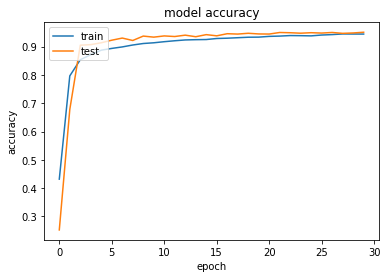

In [15]:
import matplotlib.pyplot as plt

#plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

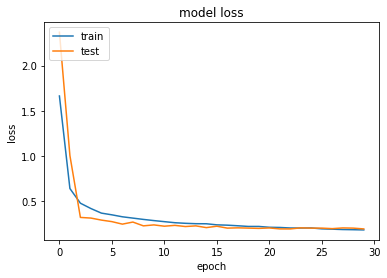

In [16]:
#plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model.save('svhn_final_model.h5')